In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

from scipy import stats

import seaborn as sns

plt.rcParams['font.family']=['Times New Roman']

In [2]:
file_address = '../Data/Merged_data/Ageout_tdap.csv'

df_age_tdap = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Merged_data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [3]:
# Read Hpv data
file_address = '../Data/Merged_data/NassauCountyHPV.xlsx'

df_hpv_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyHPV.xlsx'

df_hpv_suffolk = pd.read_excel(file_address)

# Read TDAP data
file_address = '../Data/Merged_data/NassauCountyTDAP.xlsx'

df_tdap_nassau = pd.read_excel(file_address)

file_address = '../Data/Merged_data/SuffolkCountyTDAP.xlsx'

df_tdap_suffolk = pd.read_excel(file_address)

In [4]:
df_hpv = pd.concat([df_hpv_suffolk,df_hpv_nassau])

In [5]:
#Read the Cleaned hpv patients Data:
file_address = '../Data/Merged_data/distinct_hpv_patients.csv'

hpv_patients = pd.read_csv(file_address)

file_address = '../Data/race_hpv.csv'
hpv_race = pd.read_csv(file_address)

# file_address = '../Data/total_population.csv'
# total_poplt_race = pd.read_csv(file_address)


In [6]:
def calamount(df,years,start,end):
    rate = []
    for year in years:
        lst = list(df[year])
        count = 0
        for i in range(len(lst)):
            if lst[i]:
                if lst[i]<=end and lst[i]>=start:
                    count += 1
#     print(count)
        rate.append(count)
    return np.array(rate)[4:]

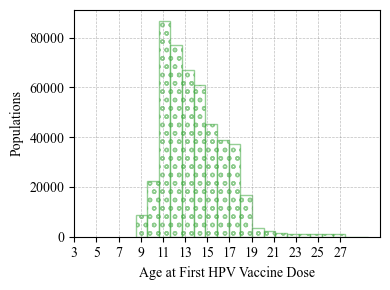

In [7]:
# demographic: age

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data,bins=20,alpha = 0.5,align = 'right',label='Male',edgecolor='C2',color='w',hatch='oo')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
# plt.title('All patients initialized the HPV vaccination')
# plt.grid(which='major',linestyle='-', color='gray', linewidth=1, alpha=0.5)
# ax.minorticks_on()
# plt.grid(which='minor',linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Overall.jpg')
# Show plot
plt.show()

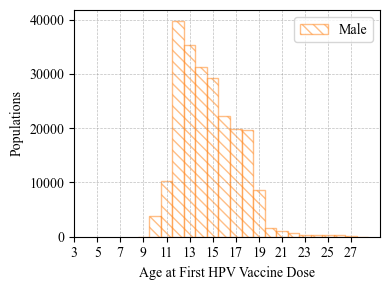

In [8]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['GENDER']=='M']
hpv_patients_female = hpv_patients[hpv_patients['GENDER']=='F']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align = 'right',label='Male',edgecolor='C1',color='w',hatch='\\\\\\')
# plt.hist(data1, bins=10,alpha = 0.5,label='Female',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
plt.tight_layout()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Male.jpg')

# Show plot
plt.show()

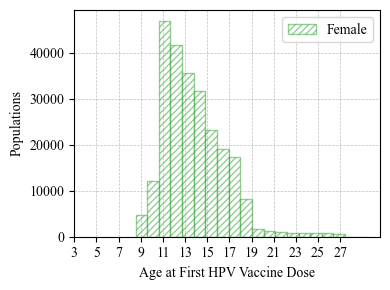

In [9]:
# demographic: age and gender


# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='Male',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align = 'right',label='Female',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_gender_dist_f.jpg')
# Show plot
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Female.jpg')
plt.show()

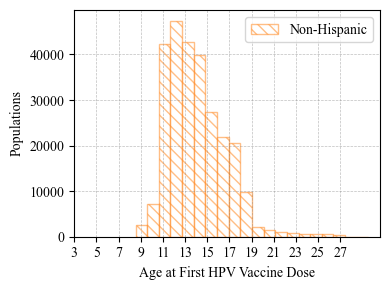

In [10]:
# demographic: Race and ethntics

hpv_patients_male = hpv_patients[hpv_patients['ETHNICITY_DESC']=='NOT HISPANIC OR LATINO']
hpv_patients_female = hpv_patients[hpv_patients['ETHNICITY_DESC']=='HISPANIC OR LATINO']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='Non-Hispanic',edgecolor='C1',color='w',hatch='\\\\\\')
# plt.hist(data1, bins=10,alpha = 0.5,label='Hispanic',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Non-His.jpg')
plt.show()

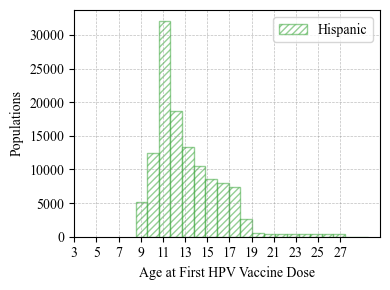

In [11]:


# demographic: Race and ethntics



# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='Non-Hispanic',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align='right',label='Hispanic',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Hispanic.jpg')
plt.show()

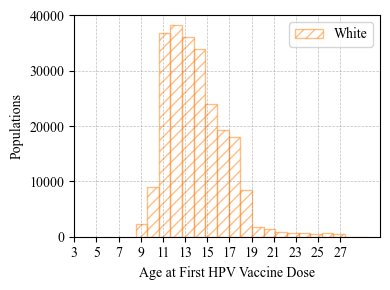

In [15]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['RACE_DESC']=='WHITE']
hpv_patients_female = hpv_patients[hpv_patients['RACE_DESC']=='BLACK OR AFRICAN-AMERICAN']

# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])
data1 = np.array(hpv_patients_female['PatientAge'])

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='White',edgecolor='C1',color='w',hatch='///')
# plt.hist(data1, bins=10,alpha = 0.5,label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/White.jpg')
plt.show()

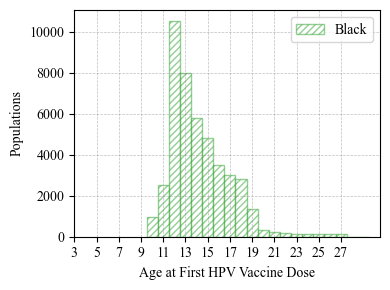

In [13]:
# demographic: age and gender

# Plot histogram
plt.figure(figsize=(4, 3))
# plt.hist(data, bins=10,alpha = 0.5,label='White',edgecolor='C1',color='w',hatch='\\\\\\')
plt.hist(data1, bins=20,alpha = 0.5,align='right',label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Black.jpg')
plt.show()

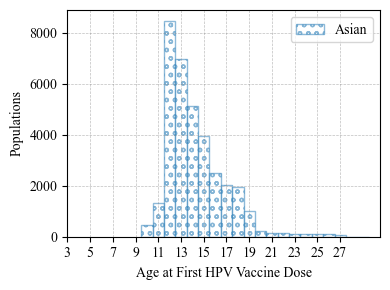

In [14]:
# demographic: age and gender

hpv_patients_male = hpv_patients[hpv_patients['RACE_DESC']=='ASIAN']


# Sample data
x_pos = np.arange(3,29,2)
x = np.arange(0,30)
data = np.array(hpv_patients_male['PatientAge'])


# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(data, bins=20,alpha = 0.5,align='right',label='Asian',edgecolor='C0',color='w',hatch='oo')
# plt.hist(data1, bins=10,alpha = 0.5,label='Black',edgecolor='C2',color='w',hatch='/////')

# Add labels and title
plt.xlabel('Age at First HPV Vaccine Dose')
plt.ylabel('Populations')
plt.xticks(x_pos, x_pos)
plt.legend()
# plt.title('Age distribution of all HPV patients')
plt.grid(True,linestyle='--', color='gray', linewidth=0.5, alpha=0.5)
# plt.savefig('/Users/zihanding/Desktop/research/HpvVaccine/AJPM/Figures/Barplot/HPV_Dose_patients_age_ethnic_dist.jpg')
# Show plot
plt.tight_layout()
plt.savefig('../Manuscript Materials/AJPM/Figures/FigureA/Asian.jpg')
plt.show()